<h2>Imports</h2>

In [341]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

<h2>First step in the pipeline: body detection</h2>

In [342]:
model_1_path = "/home/theo/Documents/Unif/Master/ChimpRec/Code/Body_detection/YOLO_small/runs/detect/train9/weights/best.pt"
model_1 = YOLO(model_1_path)

In [343]:
# returns a list of bounding boxes
def predict_1(frame_path, t_confidence=0.4):
    results = model_1(frame_path)[0]
    predicted_bboxes = []
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        if score < t_confidence : continue
        predicted_bboxes.append((x1, y1, x2, y2, score))
    return predicted_bboxes

<h2>First step extraction</h2>

In [344]:
frame_path = "/home/theo/Documents/Unif/Master/Chimprec - Extra/Detection - test set/images/20241015 - 12h41_frame_6921.png"
bboxes = predict_1(frame_path)


image 1/1 /home/theo/Documents/Unif/Master/Chimprec - Extra/Detection - test set/images/20241015 - 12h41_frame_6921.png: 384x640 3 Bodys, 57.5ms
Speed: 1.3ms preprocess, 57.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


In [345]:
#return one image cropped according to the bbox
def crop(image, bbox):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_height, img_width, _ = image.shape

    x1, y1, x2, y2, score = bbox
    x1, y1 = max(0, int(x1)), max(0, int(y1))
    x2, y2 = min(img_width, int(x2)), min(img_height, int(y2))

    return  image[y1:y2, x1:x2]

def display(cropped_images, output_folder, output_name = "out"):
    os.makedirs(output_folder, exist_ok=True)

    for i, img in enumerate(cropped_images):
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.axis("off")

        # Save image without white frame
        plt.show()
        # plt.savefig(f"{output_folder}/{output_name}_{i}.png", bbox_inches='tight', pad_inches=0)
        plt.close()  # Prevent memory leaks

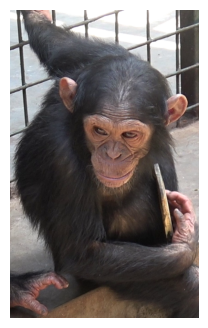

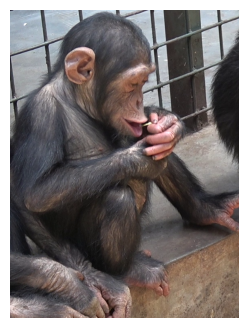

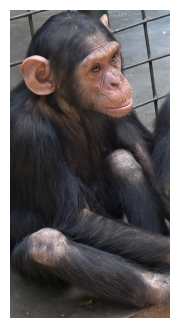

3


In [346]:
image = cv2.imread(frame_path)

cropped_images = []

for bbox in bboxes:
    cropped_images.append(crop(image, bbox))

display(cropped_images, "body_cropped", "body")
print(len(cropped_images))

<h2>Second step in the pipeline:face detection within the cropped image of the body</h2>

In [347]:
model_2_path = "/home/theo/Documents/Unif/Master/ChimpRec/Code/Face_detection/runs/detect/train3/weights/best.pt"
model_2 = YOLO(model_2_path)
cropped_images_folder = "./body_cropped"

In [348]:
for i, image in enumerate(cropped_images):
    print(np.shape(image))
    results = model_2.predict(image)
    cropped_images = []

    # Process detections
    for result in results:
        for box in result.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = box[:6]
            x1, y1, x2, y2 = map(int, (x1, y1, x2, y2))
            cropped_img = crop(image, [(x1, y1, x2, y2, score)])
            cropped_images.append(cropped_img[0])

    # Save the cropped images
    display(cropped_images, "face_cropped", f"face_{i}")


(688, 420, 3)

0: 640x416 (no detections), 55.4ms
Speed: 1.3ms preprocess, 55.4ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 416)
(754, 559, 3)

0: 640x480 (no detections), 63.2ms
Speed: 1.5ms preprocess, 63.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
(856, 443, 3)

0: 640x352 (no detections), 47.5ms
Speed: 1.5ms preprocess, 47.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 352)
